In [6]:
import cogsworth
import pynbody
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import gala.potential as gp

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [3]:
snap = cogsworth.hydro.utils.prepare_snapshot("../../../data/snapshot_600.hdf5")

cogsworth warning: Looks like you're loading a snapshot that doesn't specify its units, I'm going to infer them but make sure the outputted units looks right!
cogsworth warning: I couldn't find a halo catalogue, so I'll use pynbody's built-in halo finder to centre the snapshot


/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:394: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


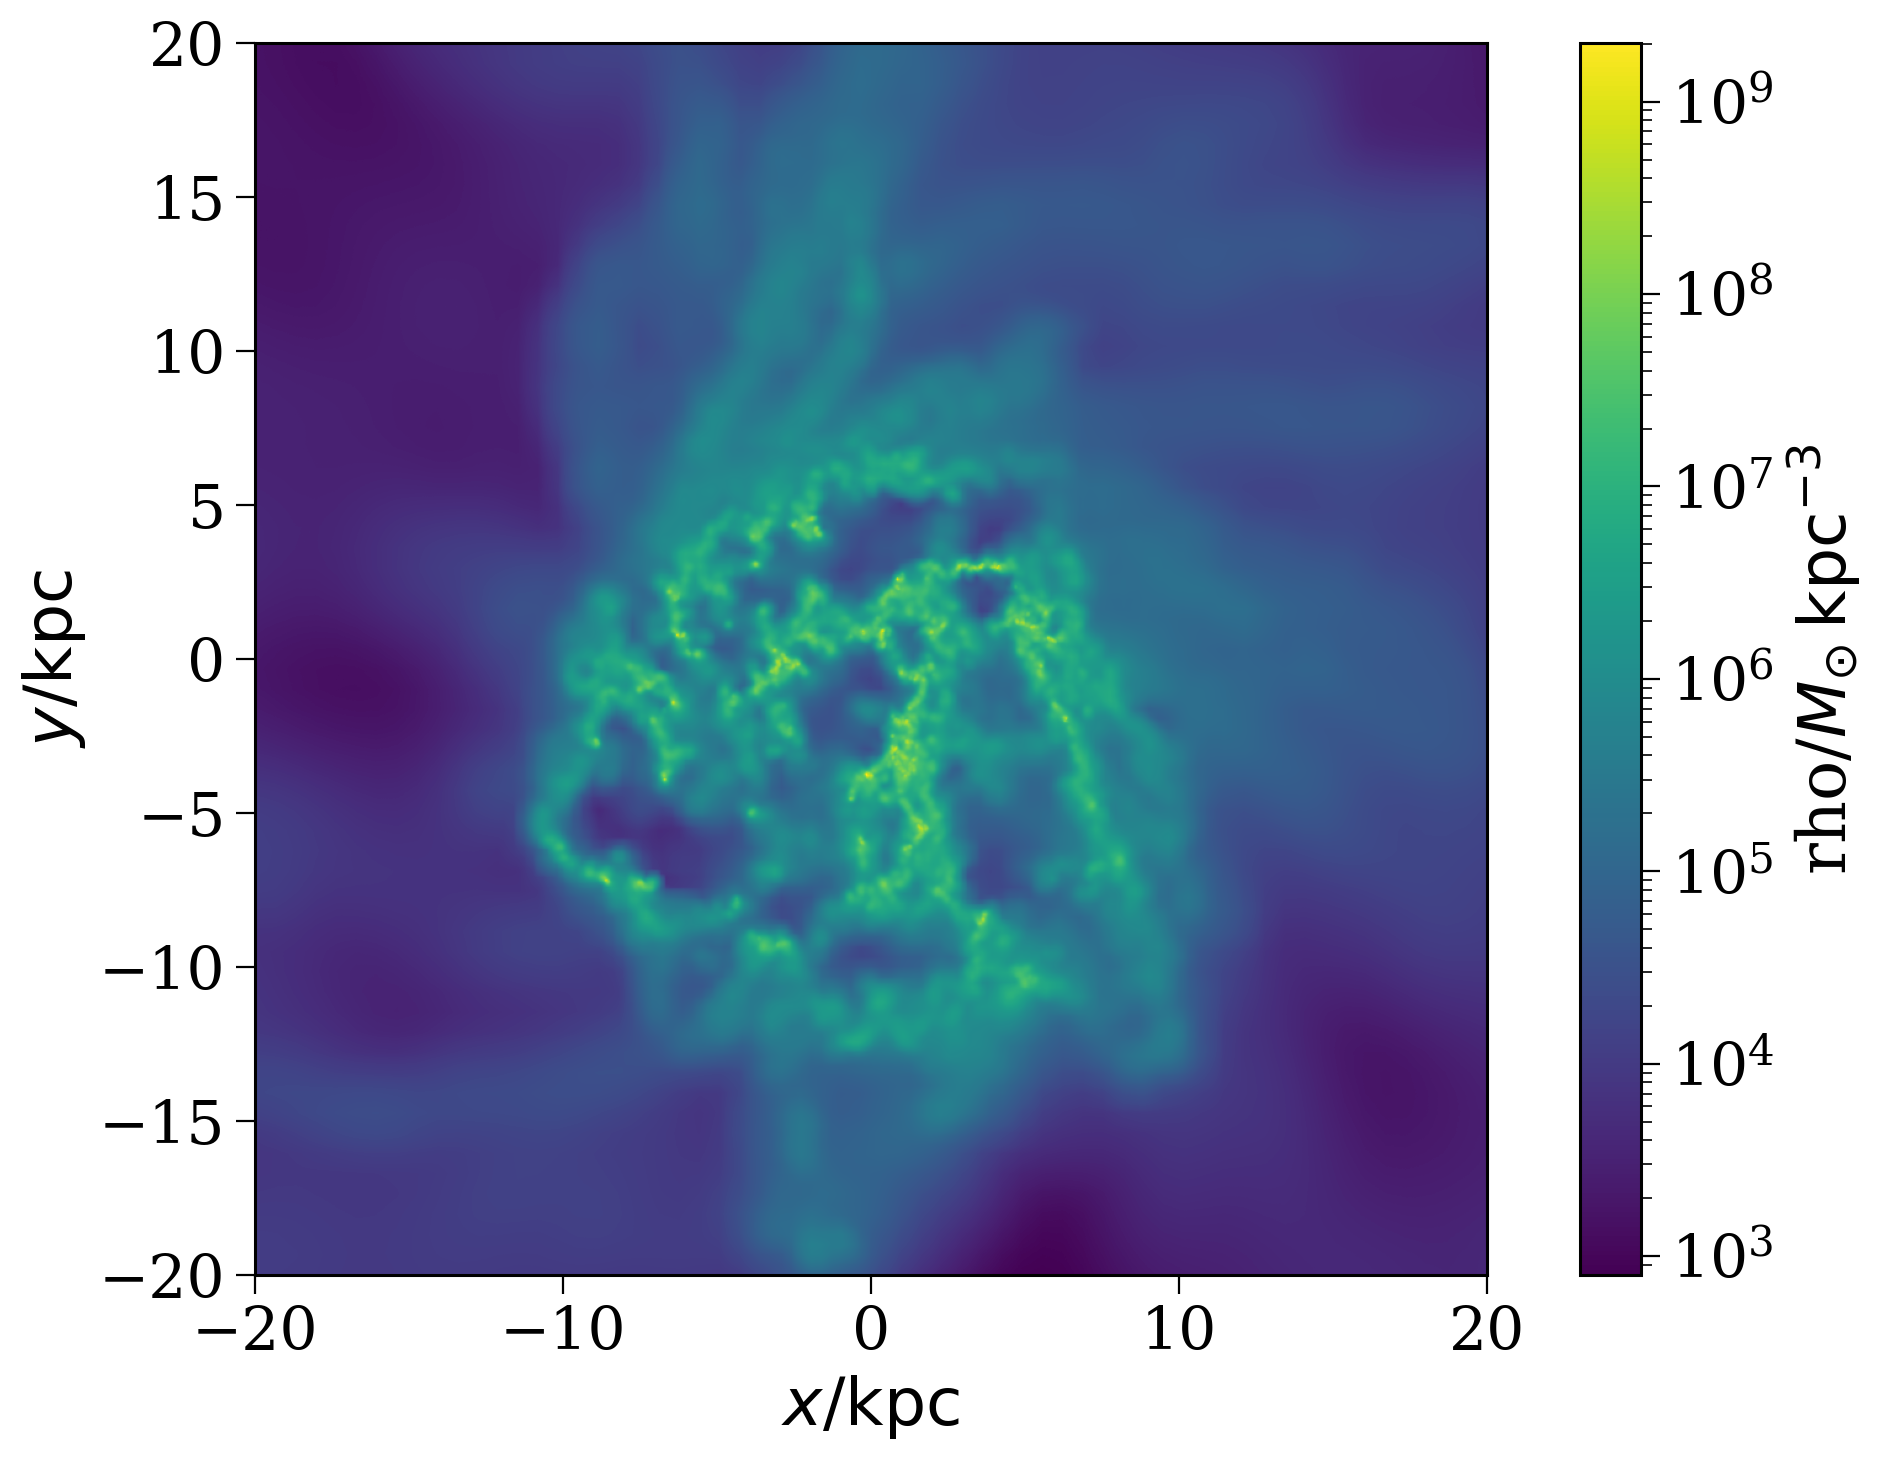

In [4]:
pynbody.plot.image(snap.gas, width=40, resolution=1000);

In [16]:
pot = gp.load("../../../cogsworth/hydro/m11h.yml")

In [9]:
pot = cogsworth.hydro.potential.get_snapshot_potential(snap[::100])

In [10]:
low_res_pot = cogsworth.hydro.potential.get_snapshot_potential(snap, nmax=2, lmax=1)

In [11]:
weird_pot = cogsworth.hydro.potential.get_snapshot_potential(snap[::100],
                                                             components=[{"attr": "dm",
                                                                          "label": "dark_matter",
                                                                          "r_s": 3}])

Let's try rewinding just the first 3 particles of the simulation

In [17]:
snap.s[:3]["iord"]

SimArray([10846552,  5726876,  6569263], dtype=uint32)

In [18]:
init_star_particles = cogsworth.hydro.rewind.rewind_to_formation(snap.s[:3], pot=pot,
                                                                 dt=-1 * u.Myr, processes=4)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 598.39it/s]


In [19]:
init_star_particles

,mass,Z,t_form,x,y,z,v_x,v_y,v_z
id,,,,,,,,,
10846552,5054.304478,0.006751,3.874034,-39.968784,37.217411,-100.197458,26.202575,-12.450640,36.281095
5726876,8013.486763,0.014378,13.735638,-6.546165,-4.008135,0.889492,46.652619,-79.332788,39.956209
6569263,9579.370813,0.017819,13.735705,-6.535423,-4.008934,0.891565,43.619342,-80.168116,37.953939


In [15]:
recent_stars = snap.s[(snap.properties["time"] - snap.s["tform"]).in_units("Myr") < 50]
recent_stars

<SimSnap "../../../data/snapshot_600.hdf5::star:indexed" len=3316>